# Определение выгодного тарифа для телеком компании

**Описание тарифов**


**Тариф «Смарт»**

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

## Изучение данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats as st

In [2]:
from matplotlib import pyplot as plt
from math import factorial

In [3]:
pd.set_option('display.max_columns', None)

Откроем и посмотрим каждый из имеющихся датасетов

### Таблица **users**

In [4]:
users = pd.read_csv('users.csv')
display(users.head(), users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


None

В таблице **users** представлена информация о пользователях. Включает в себя следующие столбцы:
- `user_id` — уникальный идентификатор пользователя
- `age` — возраст пользователя (годы)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `tariff` — название тарифного плана

Посмотрим количество абонентов по каждому тарифу.

In [5]:
users.groupby('tariff')['user_id'].count()

tariff
smart    351
ultra    149
Name: user_id, dtype: int64

Проверим наличие дубликатов в таблице **users**

In [6]:
users.duplicated().sum()

0

### Таблица **calls**

In [7]:
calls = pd.read_csv('calls.csv')
display(calls.head(),calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


None

В таблице **calls** представлена информация о звонках. Включает в себя следующие столбцы:
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

In [8]:
calls.tail()

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


Проверим наличие дубликатов в таблице **calls**

In [9]:
calls.duplicated().sum()

0

### Таблица **internet**

In [10]:
internet = pd.read_csv('internet.csv')
display(internet.head(), internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


None

Таблица **internet** сожержит информацию об интернет-сессиях. Включает в себя следующие столбцы:
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

In [11]:
internet.tail(10)

,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


Проверим наличие дубликатов в таблице **internet**

In [12]:
internet.duplicated().sum()

0

### Таблица **messages**

In [13]:
messages = pd.read_csv('messages.csv')
display(messages.head(), messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


None

Таблица **messages** содержит информацию о сообщениях.:
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [14]:
messages.tail(10)

,id,message_date,user_id
123026,1499_174,2018-12-14,1499
123027,1499_175,2018-10-09,1499
123028,1499_176,2018-12-17,1499
123029,1499_177,2018-12-30,1499
123030,1499_178,2018-10-25,1499
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


Проверим наличие дупликатов в таблице **messages**

In [15]:
messages.duplicated().sum()

0

### Таблица **tariffs**

In [16]:
tariffs = pd.read_csv('tariffs.csv')
display(tariffs.head(), tariffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None

Таблица tariffs содержит информацию о тарифах. Включает в себя следующие столбцы::
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `tariff_name` — название тарифа

### Выводы

1. Пропущенных значений в таблицах нет
2. Нарушений стиля в названии столбцов также не наблюдается
3. Явных дубликатов в таблицах не обнаружено
4. В столбцах с датами `call_date`, `message_date`, `session_date`, `churn_date`, `reg_date` указан тип object. В дальнейшем может повлиять на наши расчеты. Необходимо изменить.


## Предобработка данных

### Устранение ошибок

Изменим тип данных в таблицах **users**, **calls**, **messages**, **internet** c `object` на `datetime64`.

In [17]:
for row, col in zip([calls,messages,internet, users],['call_date','message_date','session_date', ['churn_date', 'reg_date']]):
    row[col] = row[col].astype('datetime64')

Проверим замену типов

In [18]:
display(users.info(), calls.info(), messages.info(), internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64    

None

None

None

None

### Количество звонков и израсходованных минут по месяцам

Для подсчета количества звонков и израсходованных минут по месяцам сначала добавим столбец `month`, а затем сгруппируем данные по `user_id` и `month`.

Т.к. "Мегалайн" всегда округляет секунды до минут, то округлим каждую сессию до целого значения.

In [19]:
calls['duration'] = np.ceil(calls['duration'])

In [20]:
calls['month'] = calls['call_date'].dt.month_name()
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,July
1,1000_1,2018-08-17,0.0,1000,August
2,1000_2,2018-06-11,3.0,1000,June
3,1000_3,2018-09-21,14.0,1000,September
4,1000_4,2018-12-15,6.0,1000,December


In [21]:
calls_g = calls.groupby(['user_id','month']).agg({'duration': ['count','sum']}).reset_index()
calls_g.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls_g.head()

,user_id,month,calls_count,calls_sum
0,1000,August,52,408.0
1,1000,December,46,333.0
2,1000,July,47,340.0
3,1000,June,43,172.0
4,1000,May,22,159.0


In [22]:
calls_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3174 non-null   int64  
 1   month        3174 non-null   object 
 2   calls_count  3174 non-null   int64  
 3   calls_sum    3174 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 99.3+ KB


### Определение количества отправленных сообщений по месяцам

Аналогично для таблицы **messages**. Добавляем столбец `month`, группируем данные по столбцам `user_id` и `month` и считаем количество сообщений.

In [23]:
messages['month'] = messages['message_date'].dt.month_name()
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,June
1,1000_1,2018-10-08,1000,October
2,1000_2,2018-08-04,1000,August
3,1000_3,2018-06-16,1000,June
4,1000_4,2018-12-05,1000,December


In [24]:
messages_g = messages.groupby(['user_id','month']).agg({'message_date': 'count'}).reset_index()
messages_g.columns = ['user_id', 'month', 'message_count']
messages_g.head()

,user_id,month,message_count
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


In [25]:
messages_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        2717 non-null   int64 
 1   month          2717 non-null   object
 2   message_count  2717 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 63.8+ KB


### Определение объема израсходованного интернет-трафика по месяцам

Так же поступим с таблицей **internet**.

In [26]:
internet['month'] = internet['session_date'].dt.month_name()
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,November
1,1,1000_1,1052.81,2018-09-07,1000,September
2,2,1000_2,1197.26,2018-06-25,1000,June
3,3,1000_3,550.27,2018-08-22,1000,August
4,4,1000_4,302.56,2018-09-24,1000,September


In [27]:
internet_g = internet.groupby(['user_id','month']).agg({'mb_used': 'sum'}).reset_index()
internet_g.columns = ['user_id', 'month', 'total_traffic']
internet_g.head()

,user_id,month,total_traffic
0,1000,August,14055.93
1,1000,December,9817.61
2,1000,July,14003.64
3,1000,June,23233.77
4,1000,May,2253.49


In [28]:
internet_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3203 non-null   int64  
 1   month          3203 non-null   object 
 2   total_traffic  3203 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 75.2+ KB


### Объединение датасетов

Поэтапно объединим полученные таблицы в единый датасет. 

Сначала соединим таблицы **calls** и **messages**.

In [29]:
data_a = calls_g.merge(messages_g, on=('user_id', 'month'), how='outer')

In [30]:
data_a

,user_id,month,calls_count,calls_sum,message_count
0,1000,August,52.0,408.0,81.0
1,1000,December,46.0,333.0,70.0
2,1000,July,47.0,340.0,75.0
3,1000,June,43.0,172.0,60.0
4,1000,May,22.0,159.0,22.0
...,...,...,...,...,...
3208,1489,August,NaN,NaN,17.0
3209,1489,December,NaN,NaN,35.0
3210,1489,November,NaN,NaN,20.0
3211,1489,October,NaN,NaN,21.0


Затем к полученному датасету добавим **internet**.

In [31]:
data_b = data_a.merge(internet_g, on=('user_id', 'month'), how='outer')

In [32]:
data_b

,user_id,month,calls_count,calls_sum,message_count,total_traffic
0,1000,August,52.0,408.0,81.0,14055.93
1,1000,December,46.0,333.0,70.0,9817.61
2,1000,July,47.0,340.0,75.0,14003.64
3,1000,June,43.0,172.0,60.0,23233.77
4,1000,May,22.0,159.0,22.0,2253.49
...,...,...,...,...,...,...
3209,1489,December,NaN,NaN,35.0,17322.51
3210,1489,November,NaN,NaN,20.0,17491.56
3211,1489,October,NaN,NaN,21.0,19559.44
3212,1489,September,NaN,NaN,32.0,17206.30


Затем - **users**.

In [33]:
data_c = users.merge(data_b, on='user_id', how='right')

In [34]:
data_c

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,total_traffic
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,August,52.0,408.0,81.0,14055.93
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,December,46.0,333.0,70.0,9817.61
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,July,47.0,340.0,75.0,14003.64
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,June,43.0,172.0,60.0,23233.77
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,22.0,159.0,22.0,2253.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,December,NaN,NaN,35.0,17322.51
3210,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,November,NaN,NaN,20.0,17491.56
3211,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,October,NaN,NaN,21.0,19559.44
3212,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,September,NaN,NaN,32.0,17206.30


Далее - **tariffs**. Перед присоединением таблицы **tariffs** поменяем в ней название столбца `tariff_name`, т.к. оно не совпадает с названием в таблице **data_c**

In [35]:
tariffs.rename(columns = {'tariff_name':'tariff'}, inplace = True)

In [36]:
data = data_c.merge(tariffs, on = 'tariff', how='left')

In [37]:
display(data.head(), data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   age                    3214 non-null   int64         
 2   churn_date             187 non-null    datetime64[ns]
 3   city                   3214 non-null   object        
 4   first_name             3214 non-null   object        
 5   last_name              3214 non-null   object        
 6   reg_date               3214 non-null   datetime64[ns]
 7   tariff                 3214 non-null   object        
 8   month                  3214 non-null   object        
 9   calls_count            3174 non-null   float64       
 10  calls_sum              3174 non-null   float64       
 11  message_count          2717 non-null   float64       
 12  total_traffic          3203 non-null   float64       
 13  mes

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,total_traffic,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,August,52.0,408.0,81.0,14055.93,1000,30720,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,December,46.0,333.0,70.0,9817.61,1000,30720,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,July,47.0,340.0,75.0,14003.64,1000,30720,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,June,43.0,172.0,60.0,23233.77,1000,30720,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,22.0,159.0,22.0,2253.49,1000,30720,3000,1950,150,1,1


None

### Определение помесячной выручки с каждого пользователя

Видим, что траффик в столбце `mb_used` приведен в мегабайтах, а в дальнейших расчетах понадобятся гигабайты. Поделим значения на 1000 и округлим до целых. Логично будет поменять название столбца `mb_per_month_included` на `gb_per_month_included`

Также округлим количество минут до целых значений.

In [38]:
data['total_traffic'] = np.ceil(data['total_traffic'] / 1024)
data['mb_per_month_included'] = np.ceil(data['mb_per_month_included'] / 1024)

data = data.rename(columns = {'mb_per_month_included': 'gb_per_month_included'})

Для определения помесячной выручки с каждого пользователя вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножим на значение из тарифного плана, затем прибавим абонентскую плату, соответствующую тарифному плану.

Для такого вычисления напишем функцию, учитывающую то, что некоторые пользователи не использовали полностью пакет сообщений, звонков и интернета, включенный в тариф.

In [39]:
def calc_gain(row):
    if row['calls_sum'] > row['minutes_included']:
        call_over = (row['calls_sum'] - row['minutes_included']) * row['rub_per_minute']
    else: call_over = 0
    if row['message_count'] > row['messages_included']:
        message_over = (row['message_count'] - row['messages_included']) * row['rub_per_message']
    else: message_over = 0
    if row['total_traffic'] > row['gb_per_month_included']:
        traffic_over = (row['total_traffic'] - row['gb_per_month_included']) * row['rub_per_gb']
    else: traffic_over = 0
    return call_over + message_over + traffic_over + row['rub_monthly_fee']

In [40]:
data['total_gain'] = data.apply(calc_gain, axis=1)

In [41]:
data.head(50)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,total_traffic,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_gain
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,August,52.0,408.0,81.0,14.0,1000,30.0,3000,1950,150,1,1,1950.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,December,46.0,333.0,70.0,10.0,1000,30.0,3000,1950,150,1,1,1950.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,July,47.0,340.0,75.0,14.0,1000,30.0,3000,1950,150,1,1,1950.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,June,43.0,172.0,60.0,23.0,1000,30.0,3000,1950,150,1,1,1950.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,22.0,159.0,22.0,3.0,1000,30.0,3000,1950,150,1,1,1950.0
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,November,43.0,338.0,58.0,15.0,1000,30.0,3000,1950,150,1,1,1950.0
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,October,57.0,350.0,73.0,15.0,1000,30.0,3000,1950,150,1,1,1950.0
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,September,58.0,466.0,57.0,15.0,1000,30.0,3000,1950,150,1,1,1950.0
8,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,December,63.0,414.0,NaN,14.0,50,15.0,500,550,200,3,3,550.0
9,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,November,59.0,430.0,NaN,18.0,50,15.0,500,550,200,3,3,1150.0


Посмотрим распределение значений помесячной выручки

In [42]:
data['total_gain'].value_counts()

1950.0    905
550.0     567
950.0      87
1150.0     80
1350.0     78
         ... 
2247.0      1
3083.0      1
2773.0      1
1116.0      1
1513.0      1
Name: total_gain, Length: 778, dtype: int64

### Выводы

Таким образом получили датафрейм **data** с небходимыми параметрами, разбитыми по месяцам.

## Анализ данных

Проанализируем поведение пользователей тарифами, посмотрев как много они разговаривают, отправляют сообщений и тратят интернет-трафика.

Предварительно отфильтруем значения в датасете для каждого тарифа и запишем  отдельные переменные.

In [43]:
data_smart = data.query('tariff == "smart"')
data_ultra = data.query('tariff == "ultra"')

### Анализ потраченных минут

Посмотрим, как меняется объем потраченных минут в течение года. Для этого построим графики для каждого тарифа.

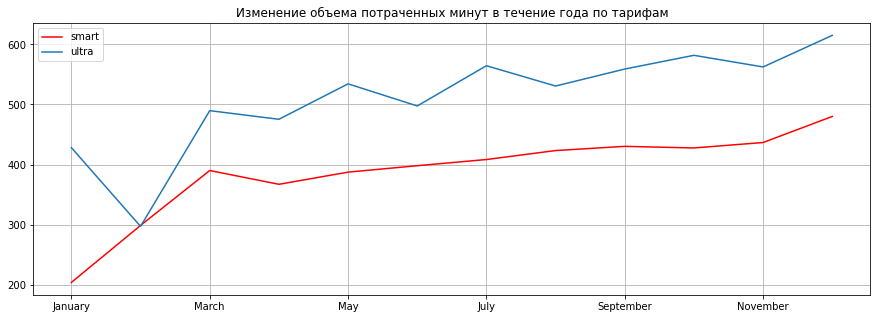

In [44]:
cats_month = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'
              , 'September', 'October', 'November', 'December']

smart_calls = (data_smart.pivot_table(index='month', values='calls_sum')
               .reindex(cats_month)
               .plot(y='calls_sum',
                     figsize=(15,5),
                     grid=True,
                     label='smart',
                     color='r',
                     title='Изменение объема потраченных минут в течение года по тарифам'))

(data_ultra.pivot_table(index='month', values='calls_sum')
.reindex(cats_month)
.plot(y='calls_sum',
      ax=smart_calls,
      figsize=(15,5),
      grid=True,
      label='ultra',
      legend=True, 
      xlabel=''));

Видим, что: 
- на тарифе ultra абоненты выговаривают больше минут, чем абоненты тарифа smart
- общая длительность звонков в течение года только растет.

Исклчение - февраль. Почему-то в феврале абоненты ultra разговоривали столько же , сколько и абоненты smart.

Посчитаем среднее, дисперсию и стандартное отклонение для каждого тарифа.

In [45]:
data.pivot_table(index='tariff', values='calls_sum', aggfunc=['mean',np.var,np.std])

,mean,var,std
,calls_sum,calls_sum,calls_sum
tariff,,,
smart,419.062978,35844.189551,189.325618
ultra,545.451104,94203.418396,306.925754


Средние значения по тарифам подтверждают увиденное на графике.

Далее посмотрим распределение значений на гистаграмме.

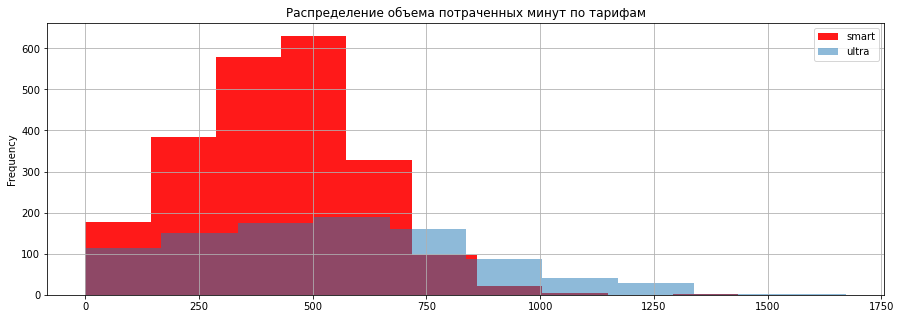

In [46]:
smart_calls_hist = (data_smart.plot(y='calls_sum',
                                    figsize=(15,5),
                                    grid=True,
                                    label='smart',
                                    kind='hist',
                                    alpha=0.9,
                                    bins=10,
                                    color='r', 
                                    title='Распределение объема потраченных минут по тарифам'))

(data_ultra.plot(y='calls_sum',
                 kind='hist',
                 ax=smart_calls_hist,
                 figsize=(15,5),
                 grid=True,
                 label='ultra',
                 legend=True,
                 alpha=0.5,
                 bins=10));

Видим, что оба распределения близки к нормальному и своей формой напоминают колокол.
Общая длительость звонков у абонентов  тарифа ultra больше, поэтому гистограмма такая растянутая. При этом она более сплюснутая, т.к.пользователей тарифа ultra меньше.

Большая часть абонентов тарифа smart разговаривают в промежутке от примерно 400 до 530 минут в месяц.
У абонентов тарифа ultra абоненты больше любят поговорить. У них в месяц потрачено от 490 до 620 минут.

### Анализ количества отправленных сообщений

Посмотрим, как меняется объем отправленных сообщений в течение года. Для этого построим графики для каждого тарифа.

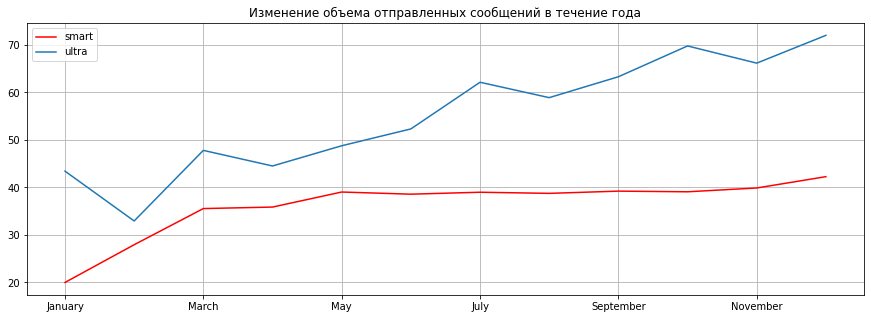

In [47]:
smart_messages = (data_smart.pivot_table(index='month', values='message_count')
                   .reindex(cats_month)
                   .plot(y='message_count',
                         figsize=(15,5),
                         grid=True,
                         label='smart',
                         color='r',
                         title='Изменение объема отправленных сообщений в течение года'))

(data_ultra.pivot_table(index='month', values='message_count')
.reindex(cats_month)
.plot(y='message_count',
      ax=smart_messages,
      figsize=(15,5),
      grid=True,
      label='ultra',
      legend=True,
      xlabel=''));

Видим, схожую ситуацию со звонками: 
- на тарифе ultra абоненты отправляют больше сообщений, чем абоненты тарифа smart
- общее количество сообщений в течение года растет у абонентов ultra. У smart с мая количество сообщений почти не меняется.

И снова февраль. Посмотрим поподробнее.

In [48]:
data.query('tariff == "ultra" and month == "February"')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,total_traffic,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_gain
559,1089,19,NaT,Иркутск,Ксения,Нечаева,2018-02-24,ultra,February,2.0,5.0,27.0,3.0,1000,30.0,3000,1950,150,1,1,1950.0
651,1104,60,NaT,Нижний Тагил,Габриэль,Поляков,2018-02-21,ultra,February,18.0,157.0,18.0,2.0,1000,30.0,3000,1950,150,1,1,1950.0
752,1120,25,NaT,Краснодар,Агнесса,Абдулина,2018-01-24,ultra,February,27.0,162.0,NaN,5.0,1000,30.0,3000,1950,150,1,1,1950.0
792,1126,71,NaT,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra,February,81.0,531.0,2.0,20.0,1000,30.0,3000,1950,150,1,1,1950.0
945,1152,44,NaT,Мурманск,Марина,Щербакова,2018-02-05,ultra,February,34.0,172.0,NaN,17.0,1000,30.0,3000,1950,150,1,1,1950.0
1041,1168,28,NaT,Кострома,Лилия,Ананьева,2018-01-24,ultra,February,123.0,884.0,47.0,19.0,1000,30.0,3000,1950,150,1,1,1950.0
1142,1180,27,NaT,Москва,Лев,Мишин,2018-02-02,ultra,February,6.0,54.0,16.0,21.0,1000,30.0,3000,1950,150,1,1,1950.0
1496,1240,30,NaT,Воронеж,Зинаида,Шарова,2018-02-27,ultra,February,2.0,0.0,NaN,1.0,1000,30.0,3000,1950,150,1,1,1950.0
1586,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,February,67.0,525.0,NaN,24.0,1000,30.0,3000,1950,150,1,1,1950.0
1594,1255,40,2018-09-02,Саранск,Серафима,Пономарева,2018-02-19,ultra,February,9.0,89.0,NaN,15.0,1000,30.0,3000,1950,150,1,1,1950.0


Уточним фильтр

In [49]:
data.query('tariff == "ultra" and month == "February" and message_count <10')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,total_traffic,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_gain
792,1126,71,NaT,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra,February,81.0,531.0,2.0,20.0,1000,30.0,3000,1950,150,1,1,1950.0
1842,1294,66,NaT,Владивосток,Дебора,Асафьева,2018-02-20,ultra,February,11.0,60.0,5.0,7.0,1000,30.0,3000,1950,150,1,1,1950.0
2361,1377,59,NaT,Брянск,Альфред,Семин,2018-02-25,ultra,February,23.0,179.0,2.0,NaN,1000,30.0,3000,1950,150,1,1,1950.0
2473,1392,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra,February,2.0,13.0,3.0,NaN,1000,30.0,3000,1950,150,1,1,1950.0
2996,1471,35,NaT,Вологда,Элеонора,Гаврилова,2018-02-26,ultra,February,9.0,76.0,6.0,2.0,1000,30.0,3000,1950,150,1,1,1950.0


Видим, что абоненты с малым количество сообщений , которое сильно влияет на среднее значение по февралю, подключились к оператору в самом конце месяца. Думаю, такая просадка связана именно с этим. Ну и это самый короткий месяц в году.

Посчитаем среднее, дисперсию и стандартное отклонение для каждого тарифа.

In [50]:
data.pivot_table(index='tariff', values='message_count', aggfunc=['mean',np.var,np.std])

,mean,var,std
,message_count,message_count,message_count
tariff,,,
smart,38.716441,717.594201,26.787949
ultra,61.161006,2109.659183,45.931026


Далее посмотрим распределение значений на гистограмме.

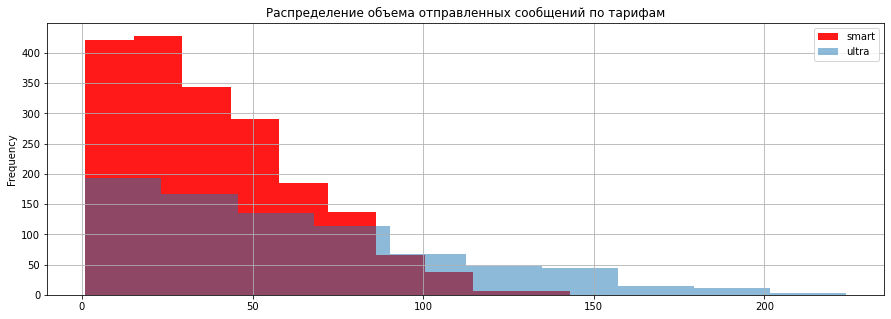

In [51]:
smart_message_hist = (data_smart.plot(y='message_count',
                                      figsize=(15,5),
                                      grid=True,
                                      label='smart',
                                      kind='hist',
                                      alpha=0.9,
                                      color='r',
                                      title='Распределение объема отправленных сообщений по тарифам'))

(data_ultra.plot(y='message_count',
                 kind='hist',
                 ax=smart_message_hist,
                 figsize=(15,5),
                 grid=True,
                 label='ultra',
                 legend=True,
                 alpha=0.5));

Видим, видим, что на обоих тарифах наибольшие количество значений отправленных за месяц близко к 0. И распределение идет по нисходящей. Все меньше и меньше людей отправляет много сообщений через СМС.

Что логично, т.к. с наличием интернета в телефоне использование СМС с каждым годом становится все менее релевантным.

### Анализ объема интернет-трафика

Повторим предыдущие действия для интернет-трафика.

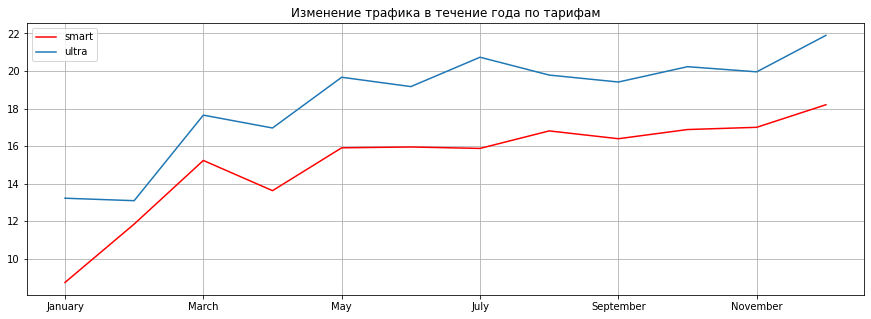

In [52]:
smart_internet = (data_smart.pivot_table(index='month', values='total_traffic')
                   .reindex(cats_month)
                   .plot(y='total_traffic',
                         figsize=(15,5),
                         grid=True,
                         label='smart',
                         color='r',title='Изменение трафика в течение года по тарифам'))

(data_ultra.pivot_table(index='month', values='total_traffic')
.reindex(cats_month)
.plot(y='total_traffic',
      ax=smart_internet,
      figsize=(15,5),
      grid=True,
      label='ultra',
      legend=True,
      xlabel=''));

Аналогично со звонками и сообщениями:
- на тарифе ultra абоненты больше тратят интернет-трафика, чем абоненты тарифа smart
- объем трафика в течение года только растет.

Посчитаем среднее, дисперсию и стандартное отклонение, а затем построим гистограмму.

In [53]:
data.pivot_table(index='tariff', values='total_traffic', aggfunc=['mean',np.var,np.std])

,mean,var,std
,total_traffic,total_traffic,total_traffic
tariff,,,
smart,16.336176,32.923756,5.737923
ultra,19.694359,94.146734,9.702924


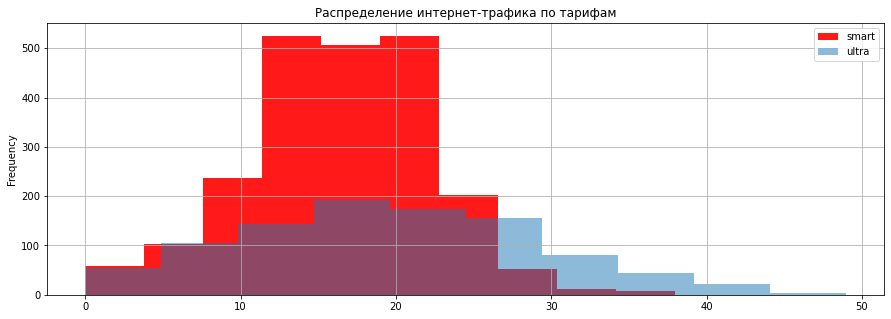

In [54]:
smart_internet_hist = (data_smart.plot(y='total_traffic',
                                    figsize=(15,5),
                                    grid=True,
                                    label='smart',
                                    kind='hist',
                                    alpha=0.9,color='r',
                                    title='Распределение интернет-трафика по тарифам'))

(data_ultra.plot(y='total_traffic',
                 kind='hist',
                 ax=smart_internet_hist,
                 figsize=(15,5),
                 grid=True,
                 label='ultra',
                 legend=True,
                alpha=0.5,
                 ));

Видим, что оба распределения близки к нормальному и своей формой напоминают колокол. Ситуация схожая с распределнием минут разговора.
Большая часть абонентов тарифа smart использует от 11 до 23 ГБ в месяц.
Большая часть абонентов тарифа ultra использует от 15 до 20 ГБ в месяц.

### Выводы
1. Согласно графикам поведение абонентов тарифов smart и ultra очень схожи. В течение года все рассмотренные показатели выросли.
2. Абоненты тарифа ultra в среднем больше разговаривают, больше отправляют сообщений, больше расходую интернет-трафика.

## Проверка гипотез

Проверим следующие гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

### Гипотеза 1

Обозначим нулевую и альтернативную гипотезы.

**H0 Нулевая гипотеза**: средняя выручка пользователей тарифов «Ультра» равна средней выручке пользователей тарифов «Смарт».

**H1 Альтернативная гипотеза**: средняя выручка пользователей тарифов «Ультра» не равна средней выручка пользователей тарифов «Смарт».

Для проверки гипотезы воспользуемся специальным методом scipy.stats.ttest_ind. 
Если уровень статистической значимости (p-value) окажется меньше порогового значения (alpha), то нулевая гипотеза отвергается. Зададим пороговое значение alpha равным 0.05.

In [55]:
alpha = 0.05

results = st.ttest_ind(data.query('tariff == "smart"')['total_gain'], data.query('tariff == "ultra"')['total_gain'])

print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Таким образом пришли к тому, что вероятность получить равные значения средних из двух выборок крайне мала. Разница между значениями слишком велика, чтобы считать это случайностью.

Отвергаем нулевую гипотезу и принимаем альтернативную - средняя выручка пользователей тарифов «Ультра» не равна средней выручка пользователей тарифов «Смарт».

Заодно посмотрим среднее  значение выручки по каждому тарифу.

Для тарифа *smart*:

In [56]:
data.query('tariff == "smart"')['total_gain'].mean()

1289.9735307312696

Для тарифа *ultra*:

In [57]:
data.query('tariff == "ultra"')['total_gain'].mean()

2070.1522842639592

Действительно, наблюдаем большое различие между средними. У тарифа *ultra* выручка выше почти в два раза.

### Гипотеза 2

Обозначим нулевую и альтернативную гипотезы.

**H0 Нулевая гипотеза**: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

**H1 Альтернативная гипотеза**: средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов.

In [58]:
alpha = 0.05
results_city = st.ttest_ind(data.query('city == "Москва"')['total_gain'], data.query('city != "Москва"')['total_gain'])

print('p-значение:', results_city.pvalue)
 
if results_city.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Таким образом пришли к тому, что вероятность получить равные значения средних из двух выборок очень высока. Средние значения очень близки друг к другу.
Отвергнуть нулевую гипотезу не вышло. Средняя выручка по Москве не сильно отличается от средней выручки по другим городам.

Посмотрим средние значения выручки с привязкой к городам.

Для Москвы:

In [59]:
data.query('city == "Москва"')['total_gain'].mean()

1546.7135842880523

Для остальных городов:

In [60]:
data.query('city != "Москва"')['total_gain'].mean()

1524.9362274298885

Разница между средними значениями минимальна - менее 2%.

## Выводы

По результатам исследования пришли к следующим выводам:
1. Поведение пользователей обоих тарифов очень схожи: в течение года наблюдается рост всех исследуемых показателей. Отличается только количесто пользователей каждого тарифа и объем пользования услугами. 

Для формирования вывода о том, какой тариф лучше, произведем некоторые дополнительные вычисления. 

Посчитаем для каждого тарифа, как часто пользователи платили сверх своей помесячной абонентской платы, т.е. выходили за рамки своих помесячных пакетов, а также общую выручку

Для тарифа *smart:*

In [61]:
len(data.query('total_gain >550 and tariff =="smart"'))

1662

In [62]:
len(data.query('total_gain >550 and tariff =="smart"')) / len(data.query('tariff =="smart"'))

0.7456258411843876

In [63]:
data.query('tariff =="smart"')['total_gain'].sum()

2875351.0

Для тарифа *ultra:*

In [64]:
len(data.query('total_gain >1950 and tariff =="ultra"'))

134

In [65]:
len(data.query('total_gain >1950 and tariff =="ultra"')) / len(data.query('tariff =="ultra"'))

0.13604060913705585

In [66]:
data.query('tariff =="ultra"')['total_gain'].sum()

2039100.0

Видим, что пользователи тарифа *ultra* намного реже выходят за рамки своих пакетов и не оплачивают дополнительные минуты и ГБ. У *ultra* - это 14% от всех пользоателей тарифом, а у *smart* - 73%. 

Общая выручка у тарифа *smart* - 2,8 млн рублей, что на выше на 37%, чем у тарифа *ultra* - 2 млн рублей. 

При этом количество пользователей тарифа *smart* больше в 2 раза, а средняя выручка с тарифа *ultra* выше более, чем в полтора раза.

1. Приходим к выводу, что компании "Мегалайн" лучше тариф *ultra*. При этом ,судя по количеству пользователей, тариф *smart* пользуется большей популярностью у пользователей, значит отказываться от него нельзя. В компании должны быть тарифные планы для разных групп клиентов и уровней дохода.